In [ ]:
import benchmax.inspection as ev
import pandas as pd
import tikzplotlib

stats    = ev.csv_to_pandas("stats_nra_25-04-10_17:36_smtrat-Eval_Calc-eval.csv")
stats    = stats.join(ev.csv_to_pandas("stats_nra_25-04-10_17:36_smtrat-Eval_Nucad-eval.csv"))
stats    = stats.join(ev.csv_to_pandas("stats_nra_25-04-24_16:18_smtrat-Eval_CalcPBcldbounds-eval.csv"))
stats    = stats.join(ev.csv_to_pandas("stats_nra_25-04-24_16:18_smtrat-Eval_NucadPBcldbounds-eval.csv"))

stats = ev.rename_solvers(stats, {
 'smtrat-Eval_Calc-eval': "CAlC",
 'smtrat-Eval_Nucad-eval': "NuCAD",
  'smtrat-Eval_CalcPBcldbounds-eval': "CAlC<BcLdBounds,BcLdBoundsCov>",
 'smtrat-Eval_NucadPBcldbounds-eval': "NuCAD<BcLdBounds>"
 })

def compute_poly_count(df, s):
    df[(s,'smtrat-cadcells_projections.poly_count')] = df[(s,'smtrat-cadcells_projections.coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.factor.level.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]
    df[(s,'smtrat-cadcells_projections.discres.poly_count')] = df[(s,'smtrat-cadcells_projections.discriminant.level.count')] + df[(s,'smtrat-cadcells_projections.resultant.level.count')]

def compute_poly_total_degree(df, s):
    df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.sum')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.sum')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.count')] = df[(s,'smtrat-cadcells_projections.coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.discriminant.total_degree.count')] + df[(s,'smtrat-cadcells_projections.factor.total_degree.count')] + df[(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.count')] + df[(s,'smtrat-cadcells_projections.resultant.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.avg')] = df[(s,'smtrat-cadcells_projections.poly.total_degree.sum')] / df[(s,'smtrat-cadcells_projections.poly.total_degree.count')]
    df[(s,'smtrat-cadcells_projections.poly.total_degree.max')] = df[[(s,'smtrat-cadcells_projections.coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.discriminant.total_degree.max'),(s,'smtrat-cadcells_projections.factor.total_degree.max'),(s,'smtrat-cadcells_projections.leading_coefficient.total_degree.max'),(s,'smtrat-cadcells_projections.resultant.total_degree.max')]].max(axis=1)

def compute_interval_count(df, s):
    df[(s,'smtrat-cadcells_heuristics.interval.point_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.point_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.closed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.closed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.halfclosed_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]
    df[(s,'smtrat-cadcells_heuristics.interval.open_count.rel')] = df[(s,'smtrat-cadcells_heuristics.interval.open_count.by_depth.total')] / df[(s,'smtrat-cadcells_heuristics.interval.count.by_depth.total')]

def compute_timer(df, s):
    def sum_timer(df,s,result,timers):
        df[(s,result+'.overall_ms')] = sum([df[(s,t+'.overall_ms')] for t in timers])
        df[(s,result+'.overall_µs')] = sum([df[(s,t+'.overall_µs')] for t in timers])
        df[(s,result+'.count')] = sum([df[(s,t+'.count')] for t in timers])
        df[(s,result+'.active_at_timeout')] = sum([df[(s,t+'.active_at_timeout')] for t in timers])

    sum_timer(df, s, 'smtrat-cadcells_projections.timer.real_root_isolation', ['smtrat-cadcells_projections.timer.real_roots','smtrat-cadcells_projections.timer.is_nullified', 'smtrat-cadcells_projections.timer.num_roots'])

for s in ev.get_solvers(stats):
    compute_poly_count(stats, s)
    compute_poly_total_degree(stats, s)
    compute_interval_count(stats, s)
    compute_timer(stats, s)
    stats = stats.copy()

stats = stats.join(ev.csv_to_pandas('stats_solvers-nra_25-01-17_08:59.csv', rename={'z3-wrapper.sh':'z3', 'cvc5-wrapper.sh':'cvc5','yicesQS-wrapper.sh':'yicesQS'}))

def sanitize(df):
    for solver in ev.get_solvers(df):
        df.loc[(df[(solver,'peak_memory_kbytes')]>3900000) & (df[(solver,'answer')]=='segfault'),(solver,'answer')] = 'memout'
        df.loc[(df[(solver,'answer')].isna()),(solver,'answer')] = 'timeout'

sanitize(stats)

ev.transform_to_seconds(stats)
ev.setup_accessible_styles()

solvers = list(ev.get_solvers(stats))

In [15]:
ev.inspect_answer(stats)

CAlC  NuCAD  CAlC<BcLdBounds,BcLdBoundsCov>  NuCAD<BcLdBounds>    z3  \
count    3819   3819                            3819               3819  3819   
sat         4      3                               4                  3     3   
unsat    3812   3810                            3812               3810  3807   
timeout     3      6                               3                  6     8   
invalid     0      0                               0                  0     1   
solved   3816   3813                            3816               3813  3810   

         cvc5  yicesQS  
count    3819     3819  
sat         3        4  
unsat    3801     3806  
timeout    15        9  
invalid     0        0  
solved   3804     3810

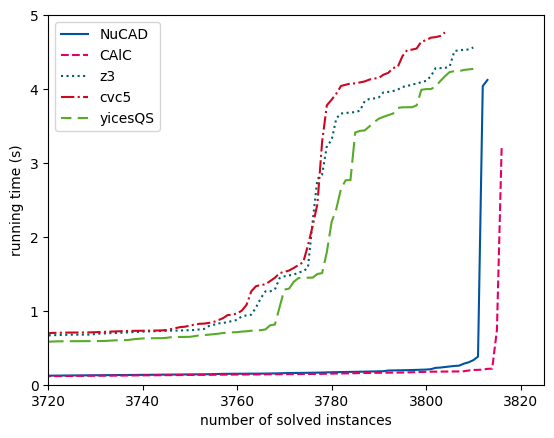

In [21]:
plot = ev.performance_profile(stats,['NuCAD<BcLdBounds>','CAlC<BcLdBounds,BcLdBoundsCov>','z3','cvc5','yicesQS'])
plot.axes.legend(['NuCAD','CAlC','z3','cvc5','yicesQS'])
plot.set_xlim(3720,3825)
plot.set_ylim(0,5)
plot.set_ylabel('running time (s)')
tikzplotlib.save('results_nra.tex',axis_width='7cm',axis_height='7cm')